In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from modules.stats import *
from modules.helper_functions import *
from scipy.stats import gaussian_kde
import os


In [2]:
suite_names = os.listdir("../../result/data/")
suite_names.remove(".DS_Store")
suite_names.remove("Icon\r")
suite_names.remove("iSerena")

In [3]:
plot_pretty()

In [4]:
elvis_iso_dir = "../../Elvis/IsolatedTrees"

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

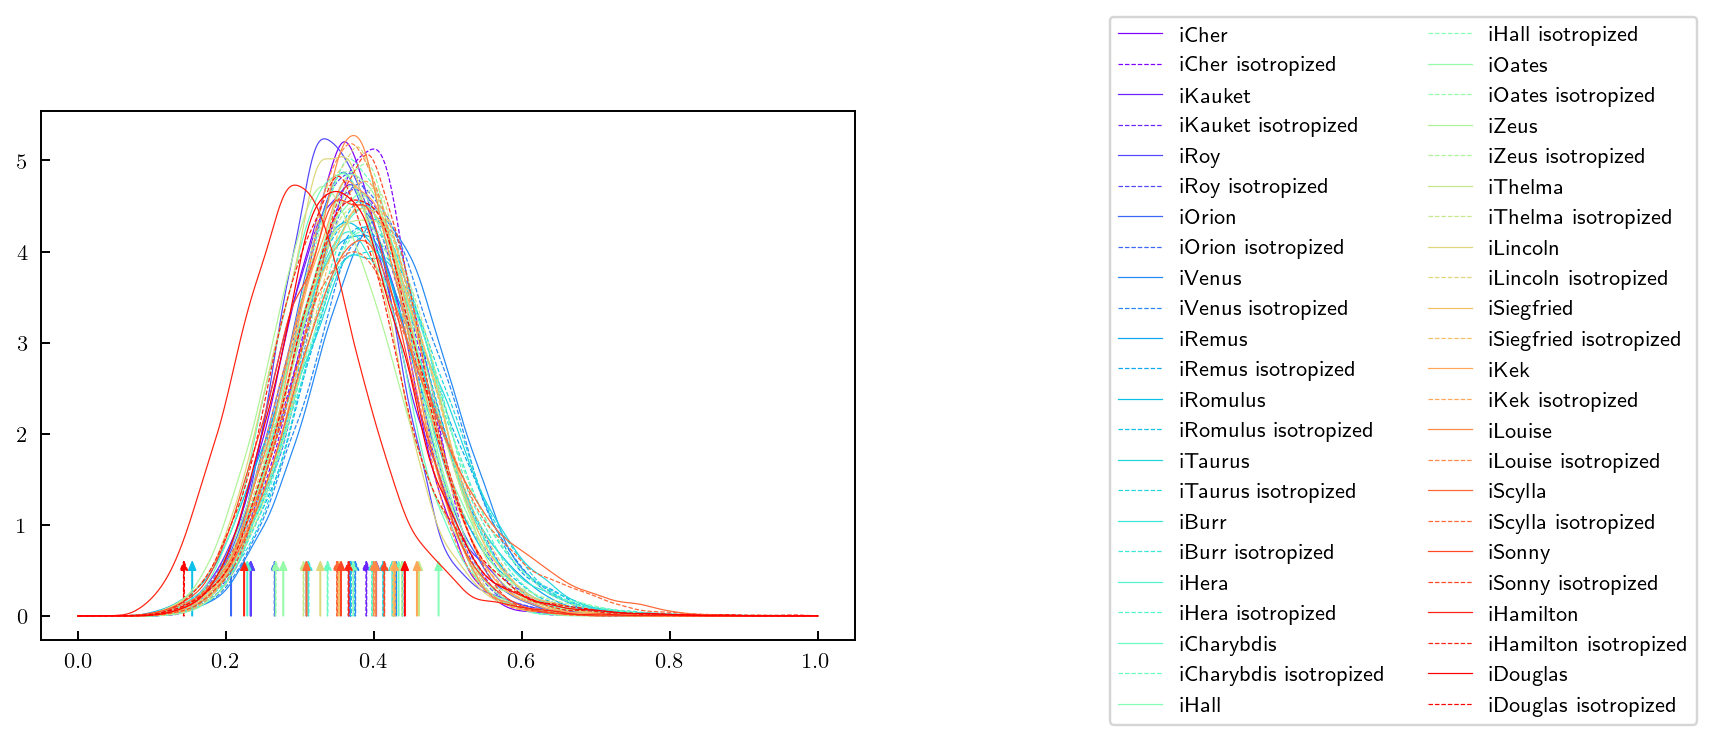

In [5]:
fig, ax = plt.subplots()

iterations = 10000
num_chosen_subhalos = 11
colors = cm.rainbow(np.linspace(0, 1, 23))

for i in range(23):
    suite_name = suite_names[i]
    data = read_elvis_tracks(elvis_iso_dir, suite_name,varnames = ['Mvir','scale','X','Y','Z','ID','pID','Rvir','Vx','Vy','Vz'])
    df = pd.read_csv(f'timedata/{suite_name}.csv')
    arr_row = np.array(df['row'])
    _, _, X0, Y0, Z0, Rvir0 = extract_data(data, 0, isVel = False, isRvir = True)
    
    
    X = (data['X'][arr_row][:,0] - X0[0]) / Rvir0[0]
    Y = (data['Y'][arr_row][:,0] - Y0[0]) / Rvir0[0]
    Z = (data['Z'][arr_row][:,0] - Z0[0]) / Rvir0[0]

    inside_index = (X**2 + Y**2 + Z**2 < 1)
    new_X = X[inside_index]
    new_Y = Y[inside_index]
    new_Z = Z[inside_index]
    
    rmss_subhalo = []
    rmss_subhalo_isotropized = []
    
    for _ in range(iterations):
        phi = np.random.uniform(size=num_chosen_subhalos)*2*np.pi
        theta = np.arccos(1-2*np.random.uniform(size=num_chosen_subhalos))
        
        temp_range = np.random.choice(np.arange(len(new_X)), size=num_chosen_subhalos, replace=False)
        x_subhalo = new_X[temp_range]
        y_subhalo = new_Y[temp_range]
        z_subhalo = new_Z[temp_range]
        pos_subhalo = np.array([x_subhalo,y_subhalo,z_subhalo]).T
        r_subhalo = (x_subhalo**2+y_subhalo**2+z_subhalo**2)**(1/2)
        r_med_subhalo = np.median(r_subhalo)
        rms_subhalo = get_smallest_rms(pos_subhalo)
        rmss_subhalo.append(rms_subhalo/r_med_subhalo)
        
        x_subhalo_isotropized = r_subhalo * np.cos(phi) * np.sin(theta)
        y_subhalo_isotropized = r_subhalo * np.sin(phi) * np.sin(theta)
        z_subhalo_isotropized = r_subhalo * np.cos(theta)
        pos_subhalo_isotropized = np.array([x_subhalo_isotropized,y_subhalo_isotropized,z_subhalo_isotropized]).T
        rms_subhalo_isotropized = get_smallest_rms(pos_subhalo_isotropized)
        rmss_subhalo_isotropized.append(rms_subhalo_isotropized/r_med_subhalo)
    
    
    phi = np.random.uniform(size=num_chosen_subhalos)*2*np.pi
    theta = np.arccos(1-2*np.random.uniform(size=num_chosen_subhalos))
    max_arr = np.max(data['Mvir'][arr_row[inside_index]], axis=1)
    argmax = np.argsort(max_arr)[-num_chosen_subhalos:]
    x_subhalo = new_X[argmax]
    y_subhalo = new_Y[argmax]
    z_subhalo = new_Z[argmax]
    pos_subhalo = np.array([x_subhalo,y_subhalo,z_subhalo]).T
    r_subhalo = (x_subhalo**2+y_subhalo**2+z_subhalo**2)**(1/2)
    x_subhalo_isotropized = r_subhalo * np.cos(phi) * np.sin(theta)
    y_subhalo_isotropized = r_subhalo * np.sin(phi) * np.sin(theta)
    z_subhalo_isotropized = r_subhalo * np.cos(theta)
    r_med_subhalo = np.median(r_subhalo)
    rms_subhalo = get_smallest_rms(pos_subhalo)
    pos_subhalo_isotropized = np.array([x_subhalo_isotropized,y_subhalo_isotropized,z_subhalo_isotropized]).T
    rms_subhalo_isotropized = get_smallest_rms(pos_subhalo_isotropized)
    
    
    
    ax.arrow(rms_subhalo/r_med_subhalo,0,0,0.5,color=colors[i],head_width=0.01,head_length=0.1,lw=0.5)
    ax.arrow(rms_subhalo_isotropized/r_med_subhalo,0,0,0.5,color=colors[i],head_width=0.01,head_length=0.1,lw=0.5,ls='--')
    kernel_subhalo = gaussian_kde(rmss_subhalo)
    kernel_subhalo_isotropized = gaussian_kde(rmss_subhalo_isotropized)
    x = np.linspace(0, 1, num = 1000)
    ax.plot(x, kernel_subhalo(x), label=f"{suite_name}", color = colors[i], lw=0.5)
    ax.plot(x, kernel_subhalo_isotropized(x), label=f"{suite_name} isotropized", color = colors[i], lw=0.5, ls = '--')
    
    
ax.legend(bbox_to_anchor=(1.3, 1.2), ncol=2)
plt.savefig(f"../../result/general/rms_dispersions_all_host_halos.pdf")

In [6]:
# temp = np.array([2,8,3,9,5,10,4])
# val = np.argsort(temp)[-3:]

# print(temp[val])